# Signal Background Preparation

In [3]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

## 3.1 Preparation of Data

In [4]:
signal = pd.read_csv('icecube/signal_train.csv')
background = pd.read_csv('icecube/background_train.csv')
test = pd.read_csv('icecube/test.csv')

Dimensio of the dataset

In [5]:
print("Signal shape: ", signal.shape)
print("Background shape: ", background.shape)
print("Test shape: ", test.shape)

Signal shape:  (17933, 283)
Background shape:  (18067, 283)
Test shape:  (4000, 282)


Remove all coluns not common to both signal and background

In [6]:
signal = signal[signal.columns.intersection(background.columns)]
background = background[background.columns.intersection(signal.columns)]

Remove all features that are linked with the MonteCarlo Simulato, specifically those that have those names in them:
- `Corsika`
- `Weight`
- `MC`

In [7]:
#remove all columns with 'corsica' in the name
signal = signal.loc[:,~signal.columns.str.contains('Corsika')]
background = background.loc[:,~background.columns.str.contains('Corsika')]


#remove all columns with 'Weight' in the name
signal = signal.loc[:,~signal.columns.str.contains('Weight')]
background = background.loc[:,~background.columns.str.contains('Weight')]


#remove all columns with 'MC' in the name
signal = signal.loc[:,~signal.columns.str.contains('MC')]
background = background.loc[:,~background.columns.str.contains('MC')]

#remove all columns with 'I3EventHeader' in the name
signal = signal.loc[:,~signal.columns.str.contains('I3EventHeader')]
background = background.loc[:,~background.columns.str.contains('I3EventHeader')]


#restet index
signal = signal.reset_index(drop=True)
background = background.reset_index(drop=True)

### Removing all the nan adn inf values

In [8]:
#check for nan values
print('Signal nan: ',signal.isnull().sum().sum())
print('Background nan: ',background.isnull().sum().sum())

#check for inf values
print('Signal inf: ',np.isinf(signal).sum().sum())
print('Background inf: ',np.isinf(background).sum().sum())

Signal nan:  326116
Background nan:  342631
Signal inf:  0
Background inf:  0


Here I print the numbner of nan per feature if there are any (>0)

In [9]:
#print the numbner of nan per feature in percent
list_nan_signal = signal.isnull().sum()
list_nan_background = background.isnull().sum()

list_nan_signal = list_nan_signal[list_nan_signal>0]
list_nan_background = list_nan_background[list_nan_background>0]

print('Signal nan per feature: ',list_nan_signal/signal.shape[0]*100)

Signal nan per feature:  LineFit_TT.energy                                             100.000000
LineFit_TT.length                                             100.000000
MPEFitHighNoise.energy                                        100.000000
MPEFitHighNoise.length                                        100.000000
MPEFitHighNoiseFitParams.logl                                   0.033458
MPEFitHighNoiseFitParams.rlogl                                  0.033458
MPEFitParaboloid.length                                       100.000000
MPEFit_TT.energy                                              100.000000
MPEFit_TT.length                                              100.000000
MPEFit_TTFitParams.logl                                         0.011153
MPEFit_TTFitParams.rlogl                                        0.011153
MuEXAngular4.energy                                           100.000000
MuEXAngular4.length                                           100.000000
SPEFit2Bayesian.energy    

In [10]:
print('Background nan per feature: ',list_nan_background/background.shape[0]*100)

Background nan per feature:  LineFit_TT.energy                                             100.000000
LineFit_TT.length                                             100.000000
MPEFitHighNoise.energy                                        100.000000
MPEFitHighNoise.length                                        100.000000
MPEFitParaboloid.length                                       100.000000
MPEFit_TT.x                                                     0.022140
MPEFit_TT.y                                                     0.022140
MPEFit_TT.z                                                     0.022140
MPEFit_TT.time                                                  0.022140
MPEFit_TT.zenith                                                0.022140
MPEFit_TT.azimuth                                               0.022140
MPEFit_TT.energy                                              100.000000
MPEFit_TT.length                                              100.000000
MPEFit_TTFitParams.log

Remove all the features that have 95% of nan values, *BUT CONSIDERING THE UNION OF ALL THE FEATURES*

In [11]:
mk_100nan_sig = list_nan_signal[list_nan_signal>0]/signal.shape[0]*100 > 95
mk_100nan_back = list_nan_background[list_nan_background>0]/background.shape[0]*100 > 95

In [12]:
#remove all features in the lists
signal = signal.drop(list_nan_signal[mk_100nan_sig].index, axis=1)
background = background.drop(list_nan_background[mk_100nan_back].index, axis=1)

Remove AGAIN all coluns not common to both signal and background and test

In [13]:
signal = signal[signal.columns.intersection(background.columns)]
background = background[background.columns.intersection(signal.columns)]

Check again if there are any features that are not in common in all the 3 datasets

In [14]:
CK = lambda x: print('Check success') if x == 0 else None
CK((signal.keys() != background.keys()).sum())

Check success


In [15]:
print("Signal shape: ", signal.shape)
print("Background shape: ", background.shape)

Signal shape:  (17933, 171)
Background shape:  (18067, 171)


## Filling the missing values

In [16]:
#replace nan values with the mean
signal.fillna(signal.mean(), inplace=True)
background.fillna(background.mean(), inplace=True)

In [17]:
#check for nan values
print('Signal nan: ',signal.isnull().sum().sum())
print('Background nan: ',background.isnull().sum().sum())

#check for inf values
print('Signal inf: ',np.isinf(signal).sum().sum())
print('Background inf: ',np.isinf(background).sum().sum())

Signal nan:  0
Background nan:  0
Signal inf:  0
Background inf:  0


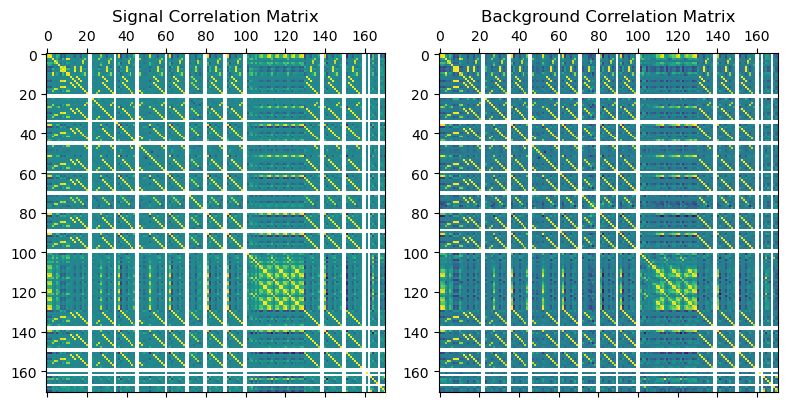

In [18]:
fig, axs = plt.subplots(1, 2, figsize=(8, 4))

# Plot the correlation matrix for signal
correlation_matrix = signal.corr()
axs[0].matshow(correlation_matrix)

# Plot the correlation matrix for background
correlation_matrix = background.corr()
axs[1].matshow(correlation_matrix)

# Set titles for the subplots
axs[0].set_title('Signal Correlation Matrix')
axs[1].set_title('Background Correlation Matrix')

# Adjust the spacing between subplots
plt.tight_layout()

# Display the plots
plt.show()

This is why we still see white space in the dataframes.

In [19]:
#print per every column all the possible values that that columns chan have if <10
count1 = 0
count2 = 0

for i in signal.columns:
    count1 += 1
    if len(signal[i].unique()) < 10:
        print(count1,i, signal[i].unique())

print('-------------------')

for i in background.columns:
    count2 += 1
    if len(background[i].unique()) < 10:
        print(count2,i, background[i].unique())


22 LineFit_TT.type [0.]
23 LineFit_TT.fit_status [0.]
35 MPEFitHighNoise.type [0.]
36 MPEFitHighNoise.fit_status [ 0. 30.]
46 MPEFitParaboloid.type [0.]
47 MPEFitParaboloid.fit_status [0.]
54 MPEFitParaboloidFitParams.status [ 0. 22. 20.]
61 MPEFit_TT.type [0.]
62 MPEFit_TT.fit_status [ 0. 30.]
71 MuEXAngular4.type [0.]
72 MuEXAngular4.fit_status [0.]
80 SPEFit2Bayesian.type [0.]
81 SPEFit2Bayesian.fit_status [0.]
90 SPEFit2_TT.type [0.]
91 SPEFit2_TT.fit_status [0.]
100 SplineMPE.type [0.]
101 SplineMPE.fit_status [0.]
110 SplineMPEDirectHitsA.n_early_strings [0. 1. 2. 3. 5. 4.]
118 SplineMPEDirectHitsC.n_early_strings [0. 1. 2. 3. 5. 4.]
126 SplineMPEDirectHitsE.n_early_strings [0. 1. 2. 3. 5. 4.]
139 SplineMPEMuEXDifferential.type [0.]
140 SplineMPEMuEXDifferential.fit_status [0.]
150 SplineMPETruncatedEnergy_SPICEMie_AllBINS_Muon.type [0.]
151 SplineMPETruncatedEnergy_SPICEMie_AllBINS_Muon.fit_status [0.]
160 SplineMPETruncatedEnergy_SPICEMie_AllDOMS_Muon.type [0.]
161 SplineMPETru

Remove all the features that have only one value

In [20]:
#remove all the features that have only one value
signal = signal.loc[:,signal.apply(pd.Series.nunique) != 1]
background = background.loc[:,background.apply(pd.Series.nunique) != 1]

In [21]:
signal = signal[signal.columns.intersection(background.columns)]
background = background[background.columns.intersection(signal.columns)]

In [22]:
#re-add the label
signal['label'] = 1
background['label'] = 0

In [23]:
#check for the shape
print('Signal shape: ',signal.shape)
print('Background shape: ',background.shape)

Signal shape:  (17933, 149)
Background shape:  (18067, 149)


In [24]:
print('Test shape: ',test.shape)

Test shape:  (4000, 282)


In [25]:
# take all the features that are in the signal and background fro the test set
test = test[test.columns.intersection(background.columns)]

In [26]:
print('Test shape: ',test.shape)

Test shape:  (4000, 148)


See below!

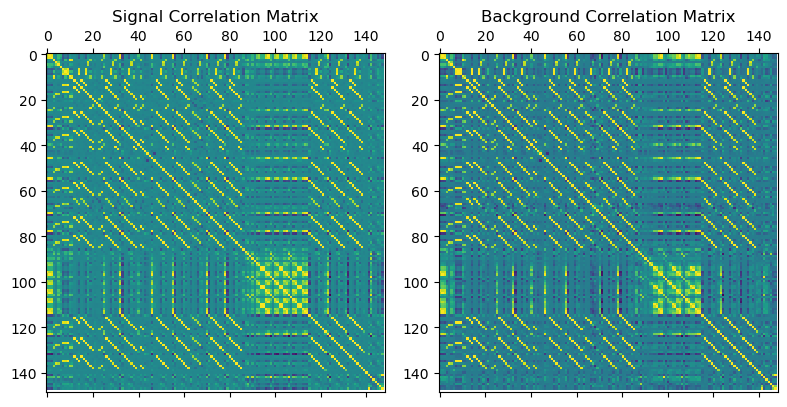

In [27]:
fig, axs = plt.subplots(1, 2, figsize=(8, 4))

# Plot the correlation matrix for signal
correlation_matrix = signal.corr()
axs[0].matshow(correlation_matrix)

# Plot the correlation matrix for background
correlation_matrix = background.corr()
axs[1].matshow(correlation_matrix)

# Set titles for the subplots
axs[0].set_title('Signal Correlation Matrix')
axs[1].set_title('Background Correlation Matrix')

# Adjust the spacing between subplots
plt.tight_layout()
# Display the plots
plt.show()

## 3.2 Attributes Selection

### Forward Selection

In [28]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

In [29]:
#merge signal and bkg
data = pd.concat([signal, background], ignore_index=True)

#randomize the data
data = data.sample(frac=1).reset_index(drop=True)

In [30]:
# X = data.drop(columns=['label'])  
# y = data['label']


# # Train-test split
# X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# # Forward Selection Function
# def forward_selection(X_train, y_train, X_test, y_test):
#     selected_features = []
#     remaining_features = list(X_train.columns)
#     best_accuracy = 0

#     while remaining_features:
#         accuracy_with_candidates = []
#         for feature in remaining_features:
#             candidates = selected_features + [feature]
#             model = RandomForestClassifier(n_estimators=100, random_state=42)
#             model.fit(X_train[candidates], y_train)
#             y_pred = model.predict(X_test[candidates])
#             accuracy = accuracy_score(y_test, y_pred)
#             accuracy_with_candidates.append((accuracy, feature))
#             print('Model with features:', candidates, 'Accuracy:', accuracy)
        
#         accuracy_with_candidates.sort(reverse=True)
#         best_new_accuracy, best_new_feature = accuracy_with_candidates[0]
        
#         if best_new_accuracy > best_accuracy:
#             best_accuracy = best_new_accuracy
#             selected_features.append(best_new_feature)
#             remaining_features.remove(best_new_feature)
#         else:
#             break
    
#     return selected_features

# # Perform Forward Selection
# selected_features_fs = forward_selection(X_train, y_train, X_test, y_test)
# print("Selected Features by Forward Selection:", selected_features_fs)

# # Using selected features to train and evaluate the final model
# X_train_fs = X_train[selected_features_fs]
# X_test_fs = X_test[selected_features_fs]

# model_fs = RandomForestClassifier(n_estimators=100, random_state=42)
# model_fs.fit(X_train_fs, y_train)
# y_pred_fs = model_fs.predict(X_test_fs)
# accuracy_fs = accuracy_score(y_test, y_pred_fs)
# print(f'Accuracy with Forward Selection: {accuracy_fs:.2f}')


### mRMR Selection

In [31]:
from mrmr import mrmr_classif

from sklearn.feature_selection import mutual_info_classif
from sklearn.model_selection import StratifiedKFold
from sklearn.datasets import make_classification

In [32]:
# Separate features and target
X = data.drop('label', axis=1)
y = data['label']

In [33]:
# Perform mRMR selection to choose the top k features
selected_features = mrmr_classif(X=X, y=y, K=20)

# Display the selected features
print("Selected features using mRMR:")
print(selected_features)

# Filter the dataset to include only the selected features
data_selected = X[selected_features]
data_selected['label'] = y

100%|██████████| 20/20 [00:04<00:00,  4.09it/s]

Selected features using mRMR:
['LineFit_TTParams.lf_vel_z', 'SplineMPEDirectHitsC.n_dir_strings', 'HitStatisticsValues.z_travel', 'SplineMPEFitParams.rlogl', 'SplineMPECharacteristics.avg_dom_dist_q_tot_dom', 'SplineMPEDirectHitsA.dir_track_length', 'LineFit_TT.zenith', 'SplineMPEDirectHitsA.n_dir_strings', 'MuEXAngular4.zenith', 'NewAtt.SplineVerRadius', 'SplineMPE.zenith', 'MuEXAngular4_Sigma.value', 'SplineMPEDirectHitsA.n_dir_doms', 'MPEFitHighNoise.zenith', 'SplineMPEMuEXDifferential.zenith', 'MPEFit_TTFitParams.rlogl', 'NewAtt.DeltaZd', 'SPEFit2_TT.zenith', 'SplineMPETruncatedEnergy_SPICEMie_AllBINS_Muon.zenith', 'SplineMPEDirectHitsC.dir_track_length']


Now the jaccard index analysis

In [57]:
# Jaccard index function
def jaccard_index(a, b):
    '''This function computes the Jaccard index of two sets.'''
    a = set(a)
    b = set(b)
    return len(a.intersection(b)) / len(a.union(b))


# Function to perform stability analysis
def stability_analysis(subsets):
    '''This function computes the stability score by averaging the Jaccard indices of all pairs of feature sets.'''
    ell = len(subsets)
    j_sum = 0
    count = 0
    for i in range(ell):
        for j in range(i + 1, ell):
            j_sum += jaccard_index(subsets[i], subsets[j])
            count += 1 
    return (2 / (ell * (ell - 1))) * j_sum if ell > 1 else 1

#test the jaccard index with simple examples
a = [1, 2, 3]
b = [2, 3, 4]
print(jaccard_index(a, b))

0.5


Below: 

### Running Feature Selection and Stability Selection
 - StratifiedKFold: We use StratifiedKFold to split the dataset into training and testing sets multiple times to ensure each fold is representative of the overall distribution.
- Feature Selection with mRMR: For each training set, we perform feature selection using the mrmr_classif function. This function selects a subset of features based on their mutual information with the target.
- Storing Selected Features: We store the selected features for each iteration and fold.
- Calculating Stability Score: We calculate the stability score by computing the Jaccard index for each pair of selected feature sets and then averaging these indices.

In [64]:
mylist = [1,2,3,4,5,6,7,8,9,10]

#mylist into pandas dataframe
mylist = pd.DataFrame(mylist)


for i in range(10):
    print(mylist.sample(frac=0.2, replace=True, random_state=i))

   0
5  6
0  1
   0
5  6
8  9
   0
8  9
8  9
    0
8   9
9  10
   0
7  8
5  6
   0
3  4
6  7
    0
9  10
3   4
    0
4   5
9  10
   0
3  4
4  5
   0
5  6
6  7


Stability Scores:
[0.43804214589569596, 0.43804214589569596, 0.43804214589569596, 0.43804214589569596, 0.43804214589569596, 0.43804214589569596, 0.43804214589569596, 0.43804214589569596, 0.43804214589569596, 0.43804214589569596]


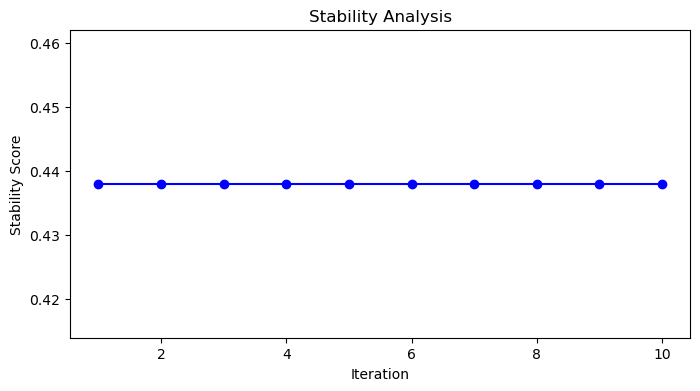

In [65]:
selected_features = selected_features[:20]

# Perform stability analysis on the selected features but with differetn subsets of the dataset
stability_scores = []

for i in range(10):
    data_subset = data_selected.sample(frac=0.2, replace=True, random_state=i)
    selected_features_subset = data_subset.drop('label', axis=1).columns
    stability_scores.append(stability_analysis(selected_features_subset))

# Display the stability scores
print("Stability Scores:")
print(stability_scores)

# Plot the stability scores
plt.figure(figsize=(8, 4))

plt.plot(range(1, 11), stability_scores, marker='o', linestyle='-', color='b')
plt.xlabel('Iteration')
plt.ylabel('Stability Score')
plt.title('Stability Analysis')
plt.show()

In [ ]:
# # Stability selection function
# def stability_selection(X, y, K=10, n_splits=10, n_iter=10):
#     kf = StratifiedKFold(n_splits=n_splits, shuffle=True, random_state=42)
#     all_selected_features = []
    
#     # Add column names to the DataFrame
#     column_names = X.columns.tolist()
    
#     for _ in range(n_iter):
#         print('Iteration:', _ , '-------------------')
#         iteration_selected_features = []
        
#         for train_index, _ in kf.split(X, y):
#             print('Now we interate over the folds')
#             X_train, y_train = X.iloc[train_index], y.iloc[train_index]
            
#             # Perform mRMR selection on the training set
#             selected_features_train = mrmr_classif(X=X_train, y=y_train, K=K)
#             print(selected_features_train)
            
#             # Convert selected feature names back to indices
#             selected_features_train_indices = {column_names.index(feat) for feat in selected_features_train}
#             iteration_selected_features.append(selected_features_train_indices)
        
#         #add all the selected features (tha s are now indicies) to the list
#         all_selected_features.extend(iteration_selected_features)
#         print('All selected features:', all_selected_features)
    
#     # Calculate the stability score
#     stability_score = stability_analysis(all_selected_features)
#     return stability_score

# # Calculate the stability score
# stability_score = stability_selection(X, y)
# print(f'Stability score: {stability_score:.2f}')

Iteration: 0 -------------------
Now we interate over the folds


 60%|██████    | 6/10 [00:01<00:00,  5.02it/s]


KeyboardInterrupt: 

In [ ]:
# #now we can use a different number of maximum selected features
# st_scores = []
# for max_features in [5, 10, 20, 30, 40, 50]:
#     # Calculate the stability score
#     stability_score = stability_selection(X, y);
#     st_scores.append(stability_score)
#     print(f'Stability score: {stability_score:.2f}')

In [ ]:
#print the selected features
print("Selected features using mRMR:")
print(selected_features)

Selected features using mRMR:
['SplineMPEDirectHitsA.dir_track_hit_distribution_smoothness', 'LineFit_TT.z', 'HitStatisticsValues.z_travel', 'SplineMPECharacteristics.track_hits_separation_length', 'NewID', 'SplineMPEFitParams.rlogl', 'SplineMPEDirectHitsA.n_dir_strings', 'MPEFitHighNoise.zenith', 'HitStatisticsValues.cog_z_sigma', 'SplineMPEDirectHitsE.n_late_doms', 'SplineMPETruncatedEnergy_SPICEMie_AllDOMS_Muon.z', 'SplineMPEDirectHitsE.dir_track_hit_distribution_smoothness', 'SplineMPEDirectHitsE.n_dir_strings', 'MPEFitParaboloidFitParams.err1', 'SplineMPECharacteristics.avg_dom_dist_q_tot_dom']


The line below is the result of the feature selection unsign the 'Forward Selection' method. Since it takes a while to run, I just used the results of a previus run.

In [ ]:
# selected_features = ['SplineMPEDirectHitsA.dir_track_hit_distribution_smoothness', 'LineFit_TT.z', 'HitStatisticsValues.z_travel', 'SplineMPECharacteristics.track_hits_separation_length', 'NewID', 'SplineMPEFitParams.rlogl', 'SplineMPEDirectHitsA.n_dir_strings', 'MPEFitHighNoise.zenith', 'HitStatisticsValues.cog_z_sigma', 'SplineMPEDirectHitsE.n_late_doms', 'SplineMPETruncatedEnergy_SPICEMie_AllDOMS_Muon.z', 'SplineMPEDirectHitsE.dir_track_hit_distribution_smoothness', 'SplineMPEDirectHitsE.n_dir_strings', 'MPEFitParaboloidFitParams.err1', 'SplineMPECharacteristics.avg_dom_dist_q_tot_dom']

## Multivariate Models

In [ ]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.preprocessing import StandardScaler

#naive bayes classifier
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split


Preprocess data

In [ ]:
# Separate features and target
X = data.drop('label', axis=1)
y = data['label']


scaler = StandardScaler()
data_selected_scaled = scaler.fit_transform(data_selected.drop(columns=['label']))
data_selected_scaled = pd.DataFrame(data_selected_scaled, columns=data_selected.drop(columns=['label']).columns)
data_selected_scaled['label'] = data_selected['label']

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(data_selected_scaled.drop(columns=['label']), data_selected_scaled['label'], test_size=0.2, random_state=42)


# Naive Bayes Classifier

In [ ]:
# Standardize the features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Create a Naive Bayes classifier
nb = GaussianNB()

# Train the classifier
nb.fit(X_train_scaled, y_train)

# Predict the labels
y_pred = nb.predict(X_test_scaled)

# Calculate the accuracy
accuracy = accuracy_score(y_test, y_pred)
print(f'Accuracy: {accuracy:.2f}')

Accuracy: 0.85


## KNN


multivariate selection using knn

Cross-validation accuracy: 0.93
Accuracy: 0.94


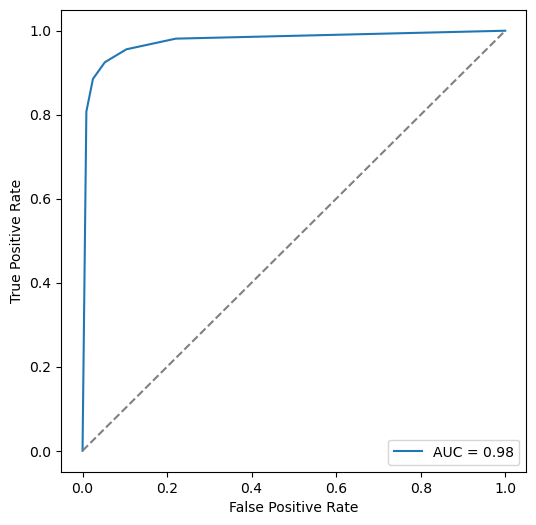

Confusion matrix:
[[3457  193]
 [ 266 3284]]


In [ ]:
#kfold cross validation
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import KFold

kf = KFold(n_splits=5, random_state=42, shuffle=True)

# Initialize the KNN model
knn = KNeighborsClassifier(n_neighbors=5)

# Perform cross-validation
cv_scores = cross_val_score(knn, X_train, y_train, cv=kf, scoring='accuracy')

# Calculate the average accuracy
cv_accuracy = cv_scores.mean()
print(f'Cross-validation accuracy: {cv_accuracy:.2f}')

# Initialize the KNN model
knn = KNeighborsClassifier(n_neighbors=5)

# Train the model
knn.fit(X_train, y_train)

# Predict the labels
y_pred = knn.predict(X_test)

# Calculate the accuracy
accuracy = accuracy_score(y_test, y_pred)
print(f'Accuracy: {accuracy:.2f}')

#plot the roc  corve#plot the roc  corve 
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score

# Calculate the probabilities
y_prob = knn.predict_proba(X_test)[:, 1]

# Calculate the ROC curve
fpr, tpr, thresholds = roc_curve(y_test, y_prob)

# Calculate the AUC
auc = roc_auc_score(y_test, y_prob)

# Plot the ROC curve
plt.figure(figsize=(6, 6))
plt.plot(fpr, tpr, label=f'AUC = {auc:.2f}')
plt.plot([0, 1], [0, 1], linestyle='--', color='gray')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')

plt.legend()
plt.show()

#plot the confusion matrix
from sklearn.metrics import confusion_matrix

# Calculate the confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred)
print('Confusion matrix:')
print(conf_matrix)

Preproces data

Cross-validated accuracy: 0.9555555555555555
Accuracy: 0.96


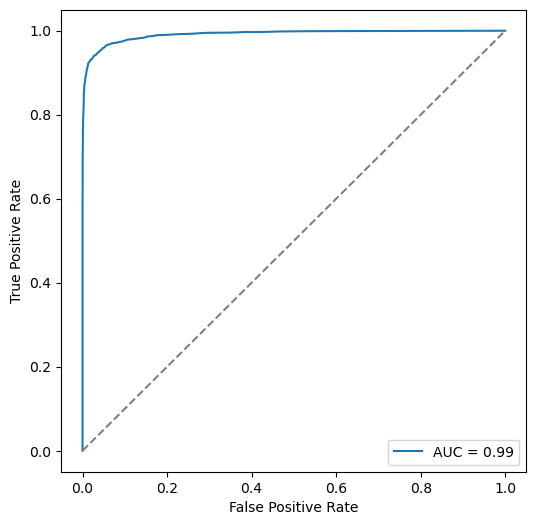

Confusion matrix:
[[3532  118]
 [ 201 3349]]


In [ ]:
#kfold cross validation
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import KFold

kf = KFold(n_splits=5, random_state=42, shuffle=True)
model = RandomForestClassifier(n_estimators=100, random_state=42)
scores = cross_val_score(model, X_train, y_train, cv=kf, scoring='accuracy')
print('Cross-validated accuracy:', scores.mean())

# Train the model
model.fit(X_train, y_train)

# Evaluate the model
y_pred = model.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print(f'Accuracy: {accuracy:.2f}')


# ------------------------------------------------


#plot the roc  corve#plot the roc  corve 
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score

# Calculate the probabilities
y_prob = model.predict_proba(X_test)[:, 1]

# Calculate the ROC curve
fpr, tpr, thresholds = roc_curve(y_test, y_prob)

# Calculate the AUC
auc = roc_auc_score(y_test, y_prob)

# Plot the ROC curve
plt.figure(figsize=(6, 6))
plt.plot(fpr, tpr, label=f'AUC = {auc:.2f}')
plt.plot([0, 1], [0, 1], linestyle='--', color='gray')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')

plt.legend()
plt.show()

#plot the confusion matrix
from sklearn.metrics import confusion_matrix

# Calculate the confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred)
print('Confusion matrix:')
print(conf_matrix)

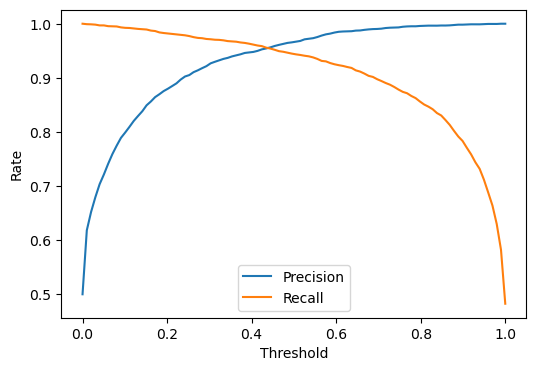

In [ ]:
#do a plot. On the x axis the value pf the trashold, on the y axis different curves: the TP, TN, FP, FN
# Calculate the probabilities
y_prob = model.predict_proba(X_test)[:, 1]

# Initialize lists to store the values
thresholds = []
tpr_values = []
fpr_values = []
tnr_values = []
fnr_values = []

# Generate a range of thresholds

for threshold in np.linspace(0, 1, 100):
    y_pred = (y_prob >= threshold).astype(int)
    conf_matrix = confusion_matrix(y_test, y_pred)
    tn, fp, fn, tp = conf_matrix.ravel()
    
    # Calculate TPR and FPR
    tpr = tp / (tp + fn)
    fpr = fp / (fp + tn)
    
    # Calculate TNR and FNR
    tnr = tn / (tn + fp)
    fnr = fn / (fn + tp)
    
    # Append the values to the lists
    thresholds.append(threshold)
    tpr_values.append(tpr)
    fpr_values.append(fpr)
    tnr_values.append(tnr)
    fnr_values.append(fnr)

#tranform the lists into numpy arrays
thresholds = np.array(thresholds)
tpr_values = np.array(tpr_values)
fpr_values = np.array(fpr_values)
tnr_values = np.array(tnr_values)
fnr_values = np.array(fnr_values)

# Plot the values
plt.figure(figsize=(6, 4))
#plot the precision 
plt.plot(thresholds, tpr_values/(tpr_values+fpr_values), label='Precision')
#plot the recall
plt.plot(thresholds, tpr_values/(tpr_values+fnr_values), label='Recall')

plt.xlabel('Threshold')
plt.ylabel('Rate')
plt.legend()
plt.show()


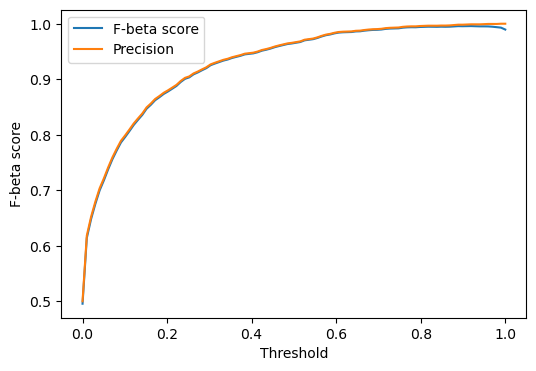

In [ ]:
#compute the fBeta score with beta = 0.1
from sklearn.metrics import fbeta_score

# Initialize the lists to store the F-beta scores
fbeta_scores = []

# Calculate the F-beta score for different thresholds
for threshold in np.linspace(0, 1, 100):
    y_pred = (y_prob >= threshold).astype(int)
    fbeta = fbeta_score(y_test, y_pred, beta=0.1)
    fbeta_scores.append(fbeta)

# Plot the F-beta scores
plt.figure(figsize=(6, 4))
plt.plot(np.linspace(0, 1, 100), fbeta_scores, label='F-beta score')
plt.plot(thresholds, tpr_values/(tpr_values+fpr_values), label='Precision')
plt.legend()
plt.xlabel('Threshold')
plt.ylabel('F-beta score')
plt.show()


In [ ]:
# def random_forest(data, K=20):
#     # Perform mRMR feature selection
#     data_selected = feat_sel_mrmr(data, K)
    
#     # Scale the selected features
#     scaler = StandardScaler()
#     data_selected_scaled = scaler.fit_transform(data_selected.drop(columns=['label']))
#     data_selected_scaled = pd.DataFrame(data_selected_scaled, columns=data_selected.drop(columns=['label']).columns)
#     data_selected_scaled['label'] = data_selected['label']
    
#     # Train-test split
#     X_train, X_test, y_train, y_test = train_test_split(data_selected_scaled.drop(columns=['label']), data_selected_scaled['label'], test_size=0.2, random_state=42)
    
#     # Train the model
#     model = RandomForestClassifier(n_estimators=100, random_state=42)
#     model.fit(X_train, y_train)
    
#     # Evaluate the model
#     y_pred = model.predict(X_test)
#     accuracy = accuracy_score(y_test, y_pred)
#     print(f'Accuracy: {accuracy:.2f}')